In [1]:
import numpy as np
import scipy.special as ss
import matplotlib.pyplot as plt

In [2]:
V=np.arange(0,5,1)

(a) $zJ′_ν(z) + νJ_ν (z) = zJ_{ν−1} (z)$


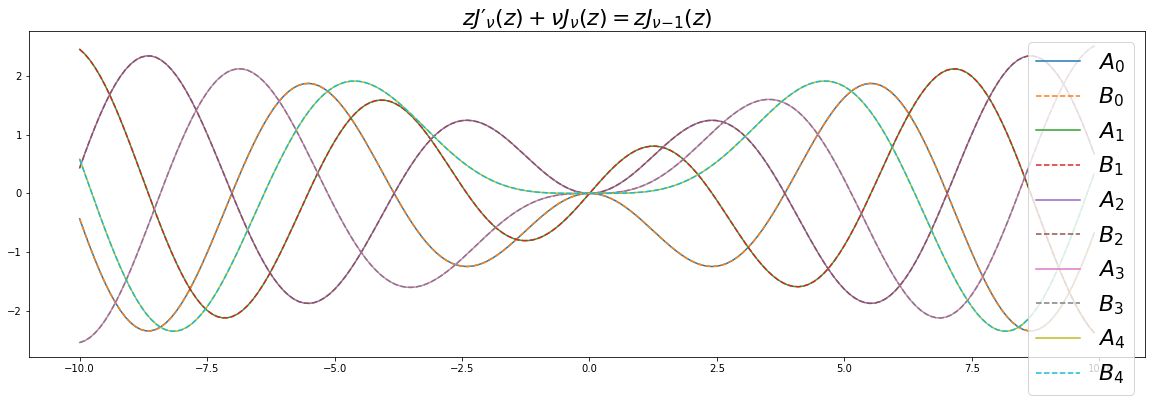

In [3]:
J=ss.jv
dJ=ss.jvp

z=np.arange(-10,10,0.1)

plt.figure(figsize=(20,6))
for v in V:
    A=z*dJ(v,z)+v*J(v,z)
    B=z*J(v-1,z)
    plt.plot(z,A,'-',label='$A_{}$'.format(v))
    plt.plot(z,B,'--',label='$B_{}$'.format(v))
    plt.title('$zJ′_ν(z) + νJ_ν (z)=zJ_{ν−1} (z)$',fontsize=22)
    plt.legend(fontsize=22)

(b) $(1-x^2)P′_n(x) + (n + 1) xP_n (x) − (n + 1)P_{n+1} (x)$


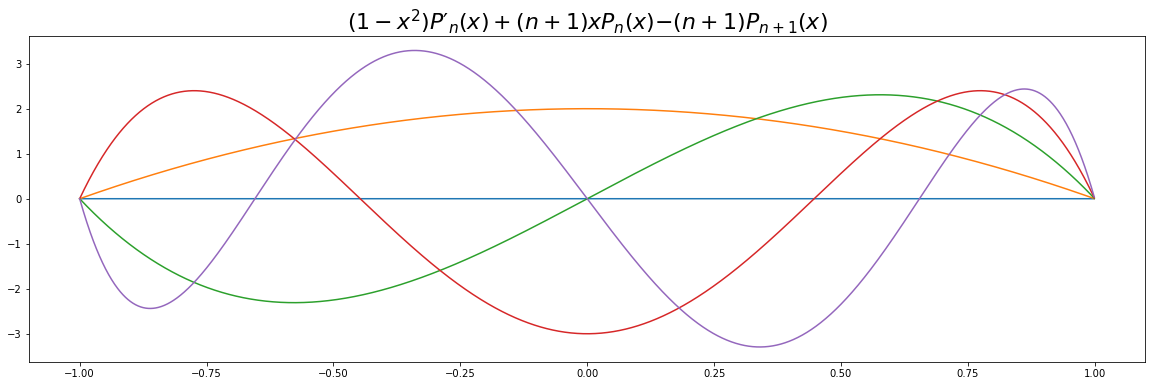

In [4]:
P = ss.legendre
x=np.arange(-1,1,0.001)

plt.figure(figsize=(20,6))
for n in V:
    #Pn=np.polyval(P(n),x)
    A=(1-x**2)*P(n).deriv()(x) + (n+1)*x*P(n)(x) - (n+1)*P(n+1)(x)
    plt.plot(x,A)
    plt.title('$(1-x^2)P′_n(x) + (n + 1) xP_n (x) − (n + 1)P_{n+1} (x)$',fontsize=22)

(c) $\displaystyle\int_{-1}^1 P_n (x) P_m (x) dx = \frac{2}{2n+1} \delta_{mn} \text{ where } \begin{equation*}\delta_{mn} = \left\{\begin{array}{rl} 0 & \text{if } m\neq n,\\ 1 & \text{if } m=n.\end{array}\right.\end{equation*} \text{ where n=0,1,2,...}$

In [5]:
from scipy.integrate import fixed_quad

def Legendre_Orthogonal(m,n,x,P):
    
    def delta(m,n):
        if m==n:
            return 1
        else :
            return 0
        
    A=fixed_quad(lambda x:(P(n)(x))*(P(m)(x)),-1,1)[0]
    B=2/(2*n+1)*delta(m,n)
    LHS=round(A,4)
    RHS=round(B,4)
    return LHS,RHS

M,N,LHS,RHS=[],[],[],[]
for m in V:
    for n in V:
        lhs,rhs=Legendre_Orthogonal(m,n,x,P)
        M.append(m)
        N.append(n)
        LHS.append(lhs)
        RHS.append(rhs)
        
import pandas as pd
display(pd.DataFrame({'m':M,'n':N,r'$\int_{-1}^1 P_n (x) P_m (x) dx$':LHS,r'$\frac{2}{2n+1} \delta_{mn}$':RHS}))

,m,n,$\int_{-1}^1 P_n (x) P_m (x) dx$,$\frac{2}{2n+1} \delta_{mn}$
0,0,0,2.0000,2.0000
1,0,1,-0.0000,0.0000
2,0,2,-0.0000,0.0000
3,0,3,-0.0000,0.0000
4,0,4,-0.0000,0.0000
5,1,0,-0.0000,0.0000
6,1,1,0.6667,0.6667
7,1,2,-0.0000,0.0000
8,1,3,-0.0000,0.0000
9,1,4,-0.0000,0.0000
